# Make Gilaldi et al figure

In [4]:
import warnings
warnings.filterwarnings('ignore')

import os
import sys
import random
import joblib
import json

import numpy as np
import pandas as pd
import sklearn
import umap
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from types import SimpleNamespace
from collections import Counter
import seaborn as sns

import torch

# Overexpression

In [51]:
base_dir = "/data/gl/g2/sachit/data/klein/perturbations/002500/sd_all_neu/"
filenames=os.listdir(base_dir)

In [52]:
neu_files = []
for elt in filenames:
    if "1_over" in str(elt) and "Klf5" not in str(elt) and "Gilaldi" not in str(elt):
        neu_files.append(elt)


In [53]:
neu_files.sort()

In [54]:
neu_files

['Cebpe_1_over.pt',
 'Dach1_1_over',
 'Lmo4_1_over.pt',
 'Mxd1_1_over.pt',
 'control1_1_over.pt',
 'control2_1_over.pt']

In [55]:
neu_genes=[]
for name in neu_files:
    neu_genes.append(str(name).split("_")[0])
neu_genes=np.unique(neu_genes)

In [56]:
neu_results = []
for elt in neu_files:
    if elt != "std.pt":
        results=torch.load(base_dir+str(elt))
        neu_results.append(results)

In [57]:
unperturbed_dist_neu =[]
unperturbed_dist_mono = []

In [58]:
neu_dist_neu = []
neu_dist_mono = []
for results in neu_results:
    neu_counts_std = []
    for labs in results["unperturbed_labs"]:
        neu_counts_std.append(Counter(labs[-1])["Neutrophil"]/200)

    neu_counts_perturb = []
    for labs in results["perturbed_labs"]:
        neu_counts_perturb.append(Counter(labs[-1])["Neutrophil"]/200)
    
    mono_counts_std = []
    for labs in results["unperturbed_labs"]:
        mono_counts_std.append(Counter(labs[-1])["Monocyte"]/200)

    mono_counts_perturb = []
    for labs in results["perturbed_labs"]:
        mono_counts_perturb.append(Counter(labs[-1])["Monocyte"]/200)
    
    unperturbed_dist_neu.append(np.array(neu_counts_std))
    unperturbed_dist_mono.append(np.array(mono_counts_std))   
    neu_dist_neu.append(np.array(neu_counts_perturb))
    neu_dist_mono.append(np.array(mono_counts_perturb))
    

In [59]:
base_dir = "/data/gl/g2/sachit/data/klein/perturbations/002500/sd_all_mono/"
filenames=os.listdir(base_dir)

In [60]:
mono_files = []
for elt in filenames:
    if "1_over" in str(elt) and "Gilaldi" not in str(elt):
        mono_files.append(elt)

In [61]:
mono_genes=[]
for name in mono_files:
    mono_genes.append(str(name).split("_")[0])
mono_genes=np.unique(mono_genes)

In [62]:
mono_files.sort()

In [63]:
mono_files

['Irf5_1_over.pt', 'Irf8_1_over.pt', 'Klf4_1_over.pt', 'Nr4a1_1_over.pt']

In [64]:
mono_results = []
for elt in mono_files:
    if elt != "std.pt":
        results=torch.load(base_dir+str(elt))
        mono_results.append(results)

In [65]:
mono_dist_neu = []
mono_dist_mono = []
for results in mono_results:
    neu_counts_std = []
    for labs in results["unperturbed_labs"]:
        neu_counts_std.append(Counter(labs[-1])["Neutrophil"]/200)

    neu_counts_perturb = []
    for labs in results["perturbed_labs"]:
        neu_counts_perturb.append(Counter(labs[-1])["Neutrophil"]/200)
    
    mono_counts_std = []
    for labs in results["unperturbed_labs"]:
        mono_counts_std.append(Counter(labs[-1])["Monocyte"]/200)

    mono_counts_perturb = []
    for labs in results["perturbed_labs"]:
        mono_counts_perturb.append(Counter(labs[-1])["Monocyte"]/200)
    
    unperturbed_dist_neu.append(np.array(neu_counts_std))
    unperturbed_dist_mono.append(np.array(mono_counts_std))
    mono_dist_neu.append(np.array(neu_counts_perturb))
    mono_dist_mono.append(np.array(mono_counts_perturb))

In [66]:
unpert=torch.load("/data/gl/g2/sachit/data/klein/perturbations/002500/unperturbed.pt")
total_unpert_mono = unpert["unperturbed_mono"]
total_unpert_neu = unpert["unperturbed_neu"]

In [67]:
mono_genes

array(['Irf5', 'Irf8', 'Klf4', 'Nr4a1'], dtype='<U5')

In [68]:
neu_genes

array(['Cebpe', 'Dach1', 'Lmo4', 'Mxd1', 'control1', 'control2'],
      dtype='<U8')

In [69]:
neu_dist_neu[0].shape

(10,)

In [70]:
neu=pd.DataFrame({mono_genes[2]: mono_dist_neu[2],
              mono_genes[1]: mono_dist_neu[1],
              mono_genes[0]: mono_dist_neu[0],
              mono_genes[3]: mono_dist_neu[3], 
              "unperturbed": total_unpert_neu,
              "control": neu_dist_neu[4],
              neu_genes[2]: neu_dist_neu[2],
              neu_genes[3]: neu_dist_neu[3],  
              neu_genes[1]: neu_dist_neu[1],     
              neu_genes[0]: neu_dist_neu[0],
             }
            )

mono=pd.DataFrame({mono_genes[2]: mono_dist_mono[2],
              mono_genes[1]: mono_dist_mono[1],
              mono_genes[0]: mono_dist_mono[0],
              mono_genes[3]: mono_dist_mono[3], 
              "unperturbed": total_unpert_mono,
              "control": neu_dist_mono[4],
              neu_genes[2]: neu_dist_mono[2],
              neu_genes[3]: neu_dist_mono[3],  
              neu_genes[1]: neu_dist_mono[1],     
              neu_genes[0]: neu_dist_mono[0],
             }
            )

In [71]:
neu["unperturbed"]

0    0.243500
1    0.243833
2    0.237542
3    0.236042
4    0.238958
5    0.243500
6    0.237125
7    0.236958
8    0.239542
9    0.244208
Name: unperturbed, dtype: float64

Text(0, 0.5, 'fraction of neutrophils')

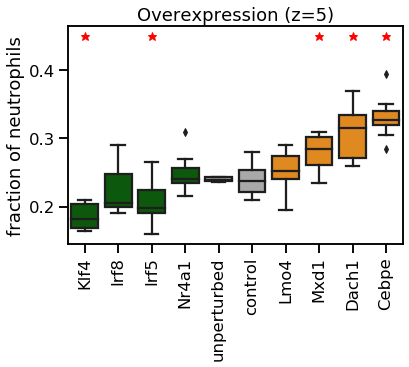

In [82]:
fig, ax = plt.subplots(figsize=(6,4), sharex=True, sharey=True)
sns.set_context("talk")
ax.title.set_text("Overexpression (z=5)")
mypal=["darkgreen", "darkgreen", "darkgreen", "darkgreen","darkgrey","darkgrey", "darkorange", "darkorange", "darkorange","darkorange"]
for j in range(0, 10):
    stat, p = scipy.stats.ttest_ind(neu["unperturbed"], neu.iloc[:,j], equal_var=False)
    x1, x2 = 0,j
    if p < .05:
        #y, h, col = neu_dist_norm[i-1].max() + height, 0, 'r'
        y=.45
        ax.plot(x2, y, "*", c="r")
g=sns.boxplot(data=neu, palette=mypal)
g.set_xticklabels(labels=neu.columns,
                  rotation=90)
g.set_ylabel("fraction of neutrophils")

Text(0, 0.5, 'fraction of monocytes')

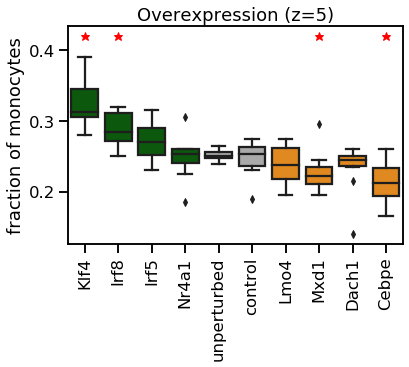

In [73]:
fig, ax = plt.subplots(figsize=(6,4), sharex=True, sharey=True)
sns.set_context("talk")
ax.title.set_text("Overexpression (z=5)")
mypal=["darkgreen", "darkgreen", "darkgreen", "darkgreen","darkgrey","darkgrey", "darkorange", "darkorange", "darkorange","darkorange"]
for j in range(0, 10):
    stat, p = scipy.stats.ttest_ind(mono["unperturbed"], mono.iloc[:,j])
    x1, x2 = 0,j
    if p < .05:
        #y, h, col = neu_dist_norm[i-1].max() + height, 0, 'r'
        y=.42
        ax.plot(x2, y, "*", c="r")
g=sns.boxplot(data=mono, palette=mypal)
g.set_xticklabels(labels=mono.columns,
                  rotation=90)
g.set_ylabel("fraction of monocytes")

In [74]:
base_dir = "/data/gl/g2/sachit/data/klein/perturbations/002500/sd_all_neu/"
filenames=os.listdir(base_dir)

In [75]:
neu_files = []
for elt in filenames:
    if "2_under" in str(elt) and "Klf5" not in str(elt) and "Gilaldi" not in str(elt):
        neu_files.append(elt)


In [76]:
neu_files.sort()

In [77]:
neu_files

['Cebpe_2_under.pt',
 'Dach1_2_under',
 'Lmo4_2_under.pt',
 'Mxd1_2_under',
 'control1_2_under.pt']

In [78]:
neu_genes=[]
for name in neu_files:
    neu_genes.append(str(name).split("_")[0])
neu_genes=np.unique(neu_genes)

In [79]:
neu_results = []
for elt in neu_files:
    if elt != "std.pt":
        results=torch.load(base_dir+str(elt))
        neu_results.append(results)

In [80]:
unperturbed_dist_neu =[]
unperturbed_dist_mono = []

In [81]:
neu_dist_neu = []
neu_dist_mono = []
for results in neu_results:
    neu_counts_std = []
    for labs in results["unperturbed_labs"]:
        neu_counts_std.append(Counter(labs[-1])["Neutrophil"]/200)

    neu_counts_perturb = []
    for labs in results["perturbed_labs"]:
        neu_counts_perturb.append(Counter(labs[-1])["Neutrophil"]/200)
    
    mono_counts_std = []
    for labs in results["unperturbed_labs"]:
        mono_counts_std.append(Counter(labs[-1])["Monocyte"]/200)

    mono_counts_perturb = []
    for labs in results["perturbed_labs"]:
        mono_counts_perturb.append(Counter(labs[-1])["Monocyte"]/200)
    
    unperturbed_dist_neu.append(np.array(neu_counts_std))
    unperturbed_dist_mono.append(np.array(mono_counts_std))   
    neu_dist_neu.append(np.array(neu_counts_perturb))
    neu_dist_mono.append(np.array(mono_counts_perturb))
    

In [36]:
base_dir = "/data/gl/g2/sachit/data/klein/perturbations/002500/sd_all_mono/"
filenames=os.listdir(base_dir)

In [37]:
mono_files = []
for elt in filenames:
    if "2_under" in str(elt) and "Gilaldi" not in str(elt):
        mono_files.append(elt)

In [38]:
mono_genes=[]
for name in mono_files:
    mono_genes.append(str(name).split("_")[0])
mono_genes=np.unique(mono_genes)

In [39]:
mono_files.sort()

In [40]:
mono_files

['Irf5_2_under.pt', 'Irf8_2_under.pt', 'Klf4_2_under.pt', 'Nr4a1_2_under.pt']

In [41]:
mono_results = []
for elt in mono_files:
    if elt != "std.pt":
        results=torch.load(base_dir+str(elt))
        mono_results.append(results)

In [42]:
mono_dist_neu = []
mono_dist_mono = []
for results in mono_results:
    neu_counts_std = []
    for labs in results["unperturbed_labs"]:
        neu_counts_std.append(Counter(labs[-1])["Neutrophil"]/200)

    neu_counts_perturb = []
    for labs in results["perturbed_labs"]:
        neu_counts_perturb.append(Counter(labs[-1])["Neutrophil"]/200)
    
    mono_counts_std = []
    for labs in results["unperturbed_labs"]:
        mono_counts_std.append(Counter(labs[-1])["Monocyte"]/200)

    mono_counts_perturb = []
    for labs in results["perturbed_labs"]:
        mono_counts_perturb.append(Counter(labs[-1])["Monocyte"]/200)
    
    unperturbed_dist_neu.append(np.array(neu_counts_std))
    unperturbed_dist_mono.append(np.array(mono_counts_std))
    mono_dist_neu.append(np.array(neu_counts_perturb))
    mono_dist_mono.append(np.array(mono_counts_perturb))

In [43]:
unpert=torch.load("/data/gl/g2/sachit/data/klein/perturbations/002500/unperturbed.pt")
total_unpert_mono = unpert["unperturbed_mono"]
total_unpert_neu = unpert["unperturbed_neu"]

In [44]:
mono_genes

array(['Irf5', 'Irf8', 'Klf4', 'Nr4a1'], dtype='<U5')

In [45]:
neu_genes

array(['Cebpe', 'Dach1', 'Lmo4', 'Mxd1', 'control1'], dtype='<U8')

In [46]:
neu_dist_neu[0].shape

(10,)

In [47]:
neu=pd.DataFrame({mono_genes[2]: mono_dist_neu[2],
              mono_genes[1]: mono_dist_neu[1],
              mono_genes[0]: mono_dist_neu[0],
              mono_genes[3]: mono_dist_neu[3], 
              "unperturbed": total_unpert_neu,
              "control": neu_dist_neu[4],
              neu_genes[2]: neu_dist_neu[2],
              neu_genes[3]: neu_dist_neu[3],  
              neu_genes[1]: neu_dist_neu[1],     
              neu_genes[0]: neu_dist_neu[0],
             }
            )

mono=pd.DataFrame({mono_genes[2]: mono_dist_mono[2],
              mono_genes[1]: mono_dist_mono[1],
              mono_genes[0]: mono_dist_mono[0],
              mono_genes[3]: mono_dist_mono[3], 
              "unperturbed": total_unpert_mono,
              "control": neu_dist_mono[4],
              neu_genes[2]: neu_dist_mono[2],
              neu_genes[3]: neu_dist_mono[3],  
              neu_genes[1]: neu_dist_mono[1],     
              neu_genes[0]: neu_dist_mono[0],
             }
            )

In [48]:
neu["unperturbed"]

0    0.243500
1    0.243833
2    0.237542
3    0.236042
4    0.238958
5    0.243500
6    0.237125
7    0.236958
8    0.239542
9    0.244208
Name: unperturbed, dtype: float64

Text(0, 0.5, 'fraction of neutrophils')

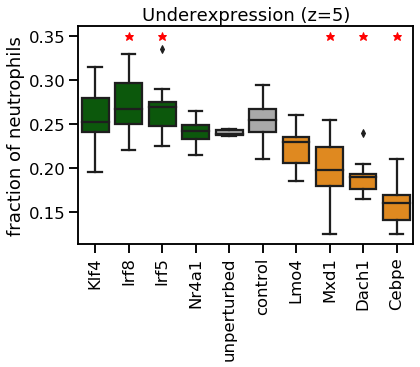

In [49]:
fig, ax = plt.subplots(figsize=(6,4), sharex=True, sharey=True)
sns.set_context("talk")
ax.title.set_text("Underexpression (z=5)")
mypal=["darkgreen", "darkgreen", "darkgreen", "darkgreen","darkgrey","darkgrey", "darkorange", "darkorange", "darkorange","darkorange"]
for j in range(0, 10):
    stat, p = scipy.stats.ttest_ind(neu["unperturbed"], neu.iloc[:,j], equal_var=False)
    x1, x2 = 0,j
    if p < .05:
        #y, h, col = neu_dist_norm[i-1].max() + height, 0, 'r'
        y=.35
        ax.plot(x2, y, "*", c="r")
g=sns.boxplot(data=neu, palette=mypal)
g.set_xticklabels(labels=neu.columns,
                  rotation=90)
g.set_ylabel("fraction of neutrophils")

Text(0, 0.5, 'fraction of monocytes')

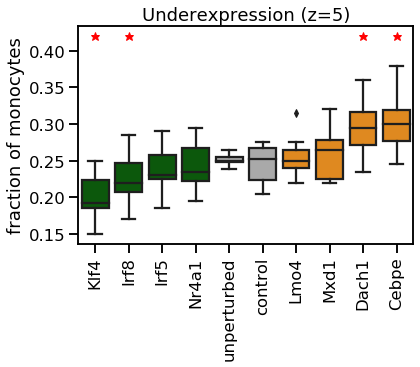

In [50]:
fig, ax = plt.subplots(figsize=(6,4), sharex=True, sharey=True)
sns.set_context("talk")
ax.title.set_text("Underexpression (z=5)")
mypal=["darkgreen", "darkgreen", "darkgreen", "darkgreen","darkgrey","darkgrey", "darkorange", "darkorange", "darkorange","darkorange"]
for j in range(0, 10):
    stat, p = scipy.stats.ttest_ind(mono["unperturbed"], mono.iloc[:,j])
    x1, x2 = 0,j
    if p < .05:
        #y, h, col = neu_dist_norm[i-1].max() + height, 0, 'r'
        y=.42
        ax.plot(x2, y, "*", c="r")
g=sns.boxplot(data=mono, palette=mypal)
g.set_xticklabels(labels=mono.columns,
                  rotation=90)
g.set_ylabel("fraction of monocytes")

# Deprecated

In [ ]:
colours=[]
for i in range(0,len(a.columns),2):
    colours.append("mediumaquamarine")
    colours.append("olive")

In [ ]:
a.columns

In [ ]:
labels=[]
for i in range(0,len(a.columns), 2):
    labels.append(a.columns[i].split("_")[0])
    labels.append("")

In [ ]:
labels

In [354]:
labels=[labels[0],
        labels[1],
        labels[2],
        labels[3],
        labels[4],
        labels[5],
        labels[6],
        labels[7],
        labels[10],
        labels[9],
        labels[8], 
        labels[11],
       labels[12],
       labels[13],
       labels[14],
       labels[15]]

In [376]:
mono.to_csv("/data/gl/g2/sachit/data/klein/perturbations/002500/individual_dfs/monocyte_fractions_2_over.csv")
neu.to_csv("/data/gl/g2/sachit/data/klein/perturbations/002500/individual_dfs/neutrophil_fractions_2_over.csv")

([<matplotlib.axis.XTick at 0x7f163ec1b850>,
 <a list of 16 Text xticklabel objects>)

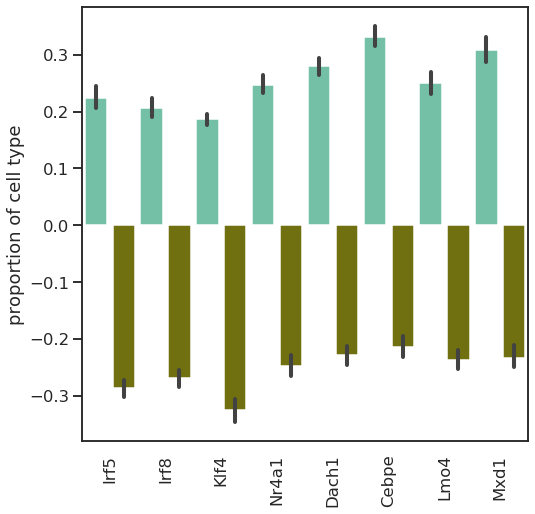

In [355]:
sns.set_context("talk")
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111)
g=sns.barplot(data=a, orient="v", palette=colours)
g.set_xticklabels(labels=labels,rotation=90)
ax.set_ylabel("proportion of cell type")
#ax.axis('off')
#ax.get_yaxis().set_visible(False)
plt.xticks(np.arange(0.5, len(labels), step=1))

In [209]:
sad=pd.DataFrame({"neutrophil":[1,2], "monocyte":[4,2]})

In [218]:
fig = plt.figure(figsize=(10,5))
sns.lineplot(data=sad,"-", palette=["green", "lightgreen"])
plt.legend(labels=sad.columns)

SyntaxError: positional argument follows keyword argument (<ipython-input-218-d7b8cab98dac>, line 2)